# Exploración de datos iniciales

A continuación se realiza una exploración inicial de la base de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_path = '/content/df_final.xlsx'

In [6]:
data_complete = pd.read_excel(data_path)

In [7]:
data_complete.head()

,Electricity demand Colombia 2013 [MW],Electricity demand Colombia 2015 [MW],Electricity demand Colombia 2014 [MW],Electricity demand Colombia 2016 [MW],Electricity demand Colombia 2012 [MW],Daily natural water inflows time series 2010 [GW],Daily natural water inflows time series 2009 [GW],Daily natural water inflows time series 2014 [GW],Daily natural water inflows time series 2012 [GW],Daily natural water inflows time series 2016 [GW],...,ExportsTotal 2012 MW,ExportsTotal 2016 MW,ImportsTotal 2015 MW,ExportsTotal 2014 MW,ImportsTotal 2013 MW,ExportsTotal 2013 MW,ImportsTotal 2012 MW,ImportsTotal 2016 MW,ExportsTotal 2015 MW,ImportsTotal 2014 MW
0,5754.0,6069.88,6237.74599,6315.56,5704.0,45.62,91.36,88.29,108.04,63.50,...,10.66,0.65,0.00,291.50,0.00,0.82,0.00,0.00,0.74,0.0
1,5519.0,5827.25,6006.22452,6139.46,5371.0,43.10,80.43,81.41,109.26,55.78,...,0.06,0.09,0.24,291.23,0.00,0.36,0.87,0.92,0.00,0.0
2,5239.0,5574.38,5723.68895,5934.56,5052.0,43.40,158.69,99.23,174.76,61.74,...,1.22,0.12,0.00,290.44,0.50,0.09,0.00,0.79,1.27,0.0
3,4991.0,5395.87,5468.91281,5715.72,4818.0,40.41,168.00,85.18,142.50,70.14,...,0.36,0.12,0.04,274.12,1.05,0.12,0.00,0.33,0.00,0.0
4,4825.0,5258.90,5254.70454,5550.86,4673.0,41.19,95.23,83.82,179.57,64.12,...,1.15,0.12,0.00,202.11,0.00,0.78,0.00,0.36,0.83,0.0


In [8]:
data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 49 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Electricity demand Colombia 2013 [MW]                8784 non-null   float64
 1   Electricity demand Colombia 2015 [MW]                8784 non-null   float64
 2   Electricity demand Colombia 2014 [MW]                8784 non-null   float64
 3   Electricity demand Colombia 2016 [MW]                8784 non-null   float64
 4   Electricity demand Colombia 2012 [MW]                8784 non-null   float64
 5   Daily natural water inflows time series 2010 [GW]    365 non-null    float64
 6   Daily natural water inflows time series 2009 [GW]    365 non-null    float64
 7   Daily natural water inflows time series 2014 [GW]    365 non-null    float64
 8   Daily natural water inflows time series 2012 [GW]    365 non-null   

# División de base de datos segun su tamaño

La base de datos original contiene dos tipos de datos, los datos por hora en un año, lo cual suman un total de 8784 registros, y los que son un promedio por día en cada año lo cual tienen un total de 365 registros

A continuación vamos a dividir la base de datos, dependiendo del número de registros

In [17]:
indices_8784 = data_complete.columns[data_complete.notnull().sum() == 8784].tolist()
print(indices_8784)


['Electricity demand Colombia 2013 [MW]', 'Electricity demand Colombia 2015 [MW]', 'Electricity demand Colombia 2014 [MW]', 'Electricity demand Colombia 2016 [MW]', 'Electricity demand Colombia 2012 [MW]', 'Hourly average hydropower generation ENSO-NINO [MW]', 'Hourly hydropower generation 2014 [MW]', 'Hourly average hydropower generation ENSO-NINA [MW]', '3', '6', '5', '2', '1', '4', '7', 'ExportsTotal 2012 MW', 'ExportsTotal 2016 MW', 'ImportsTotal 2015 MW', 'ExportsTotal 2014 MW', 'ImportsTotal 2013 MW', 'ExportsTotal 2013 MW', 'ImportsTotal 2012 MW', 'ImportsTotal 2016 MW', 'ExportsTotal 2015 MW', 'ImportsTotal 2014 MW']


In [18]:
hours_data = data_complete[indices_8784]
hours_data.head()

,Electricity demand Colombia 2013 [MW],Electricity demand Colombia 2015 [MW],Electricity demand Colombia 2014 [MW],Electricity demand Colombia 2016 [MW],Electricity demand Colombia 2012 [MW],Hourly average hydropower generation ENSO-NINO [MW],Hourly hydropower generation 2014 [MW],Hourly average hydropower generation ENSO-NINA [MW],3,6,...,ExportsTotal 2012 MW,ExportsTotal 2016 MW,ImportsTotal 2015 MW,ExportsTotal 2014 MW,ImportsTotal 2013 MW,ExportsTotal 2013 MW,ImportsTotal 2012 MW,ImportsTotal 2016 MW,ExportsTotal 2015 MW,ImportsTotal 2014 MW
0,5754.0,6069.88,6237.74599,6315.56,5704.0,2423.621,4224.64603,4775.296765,6.41616,326.84,...,10.66,0.65,0.00,291.50,0.00,0.82,0.00,0.00,0.74,0.0
1,5519.0,5827.25,6006.22452,6139.46,5371.0,2193.202,3916.76549,4540.974035,4.79236,302.41,...,0.06,0.09,0.24,291.23,0.00,0.36,0.87,0.92,0.00,0.0
2,5239.0,5574.38,5723.68895,5934.56,5052.0,1890.317,3649.41612,4235.410985,4.86873,299.31,...,1.22,0.12,0.00,290.44,0.50,0.09,0.00,0.79,1.27,0.0
3,4991.0,5395.87,5468.91281,5715.72,4818.0,1622.020,3727.94469,3936.844555,6.11451,297.58,...,0.36,0.12,0.04,274.12,1.05,0.12,0.00,0.33,0.00,0.0
4,4825.0,5258.90,5254.70454,5550.86,4673.0,1435.415,3584.21360,3751.254080,5.90758,298.66,...,1.15,0.12,0.00,202.11,0.00,0.78,0.00,0.36,0.83,0.0


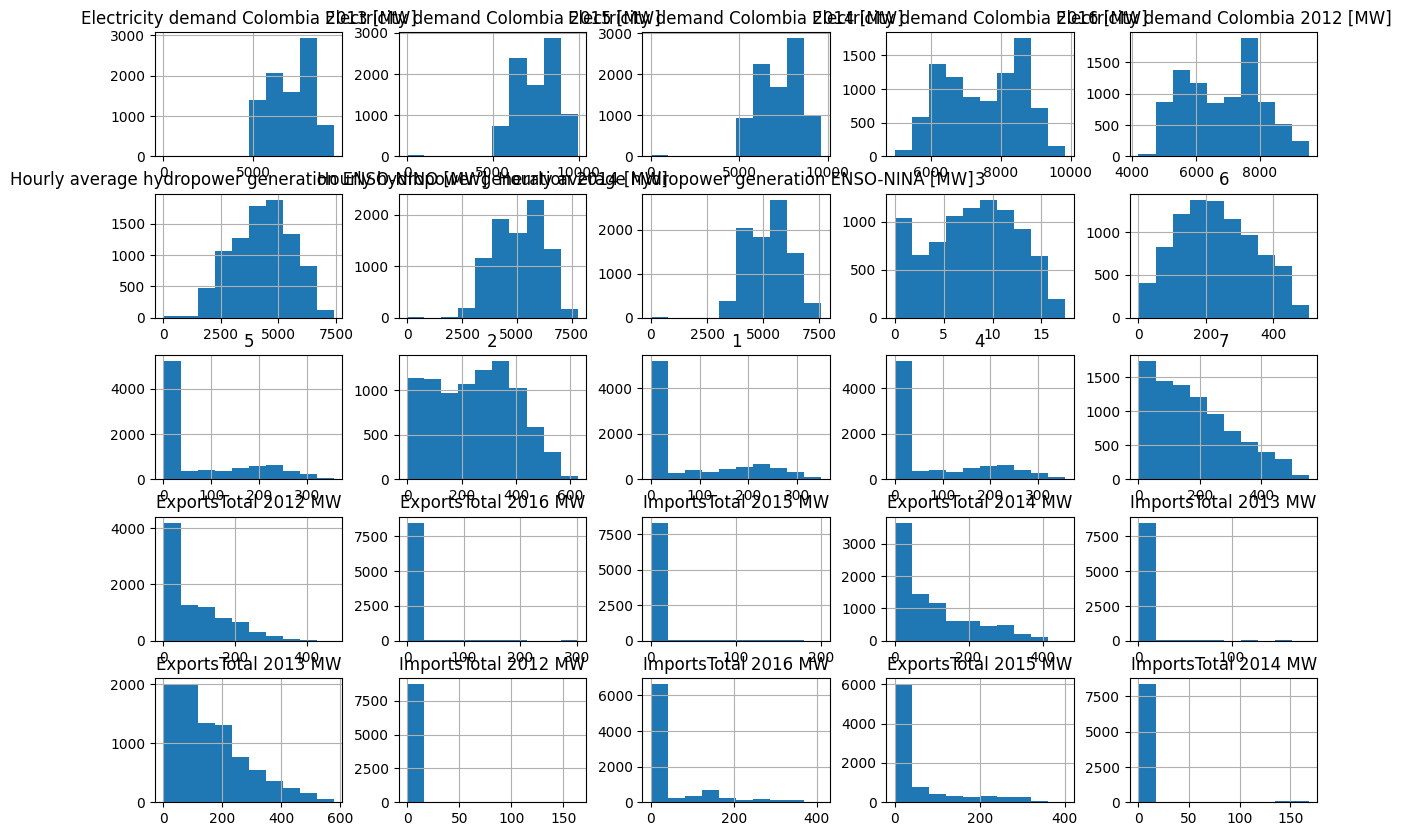

In [19]:
# prompt: plotea la distribucción de la base de datos hours_data

hours_data.hist(figsize=(15, 10))
plt.show()


In [38]:
other_data = data_complete.drop(indices_8784, axis=1)
other_data.head()

,Daily natural water inflows time series 2010 [GW],Daily natural water inflows time series 2009 [GW],Daily natural water inflows time series 2014 [GW],Daily natural water inflows time series 2012 [GW],Daily natural water inflows time series 2016 [GW],Daily natural water inflows time series 2007 [GW],Table 1,Installed capacity in Colombia 2006-2016,Daily natural water inflows time series 2011 [GW],Daily natural water inflows time series 2006 [GW],...,19,5 MW,Wind_generation_ENSO-NINO,Solar_generation_ENSO- NINA,Estimated Wind generation - Installed cap,658 MW,Estimated Solar PV generation - Installed cap,520 MW,Solar_generation_ENSO-NINO,Wind_generation_ENSO-NINA
0,45.62,91.36,88.29,108.04,63.50,59.37,NaN,NaN,104.60,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43.10,80.43,81.41,109.26,55.78,70.43,NaN,NaN,106.86,59.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43.40,158.69,99.23,174.76,61.74,62.26,NaN,NaN,105.25,61.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40.41,168.00,85.18,142.50,70.14,62.29,NaN,NaN,144.52,79.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41.19,95.23,83.82,179.57,64.12,65.30,NaN,NaN,157.49,88.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
hours_data.iloc[:,:8]

,Electricity demand Colombia 2013 [MW],Electricity demand Colombia 2015 [MW],Electricity demand Colombia 2014 [MW],Electricity demand Colombia 2016 [MW],Electricity demand Colombia 2012 [MW],Hourly average hydropower generation ENSO-NINO [MW],Hourly hydropower generation 2014 [MW],Hourly average hydropower generation ENSO-NINA [MW]
0,5754.0,6069.88,6237.74599,6315.56,5704.0,2423.621,4224.64603,4775.296765
1,5519.0,5827.25,6006.22452,6139.46,5371.0,2193.202,3916.76549,4540.974035
2,5239.0,5574.38,5723.68895,5934.56,5052.0,1890.317,3649.41612,4235.410985
3,4991.0,5395.87,5468.91281,5715.72,4818.0,1622.020,3727.94469,3936.844555
4,4825.0,5258.90,5254.70454,5550.86,4673.0,1435.415,3584.21360,3751.254080
...,...,...,...,...,...,...,...,...
8791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


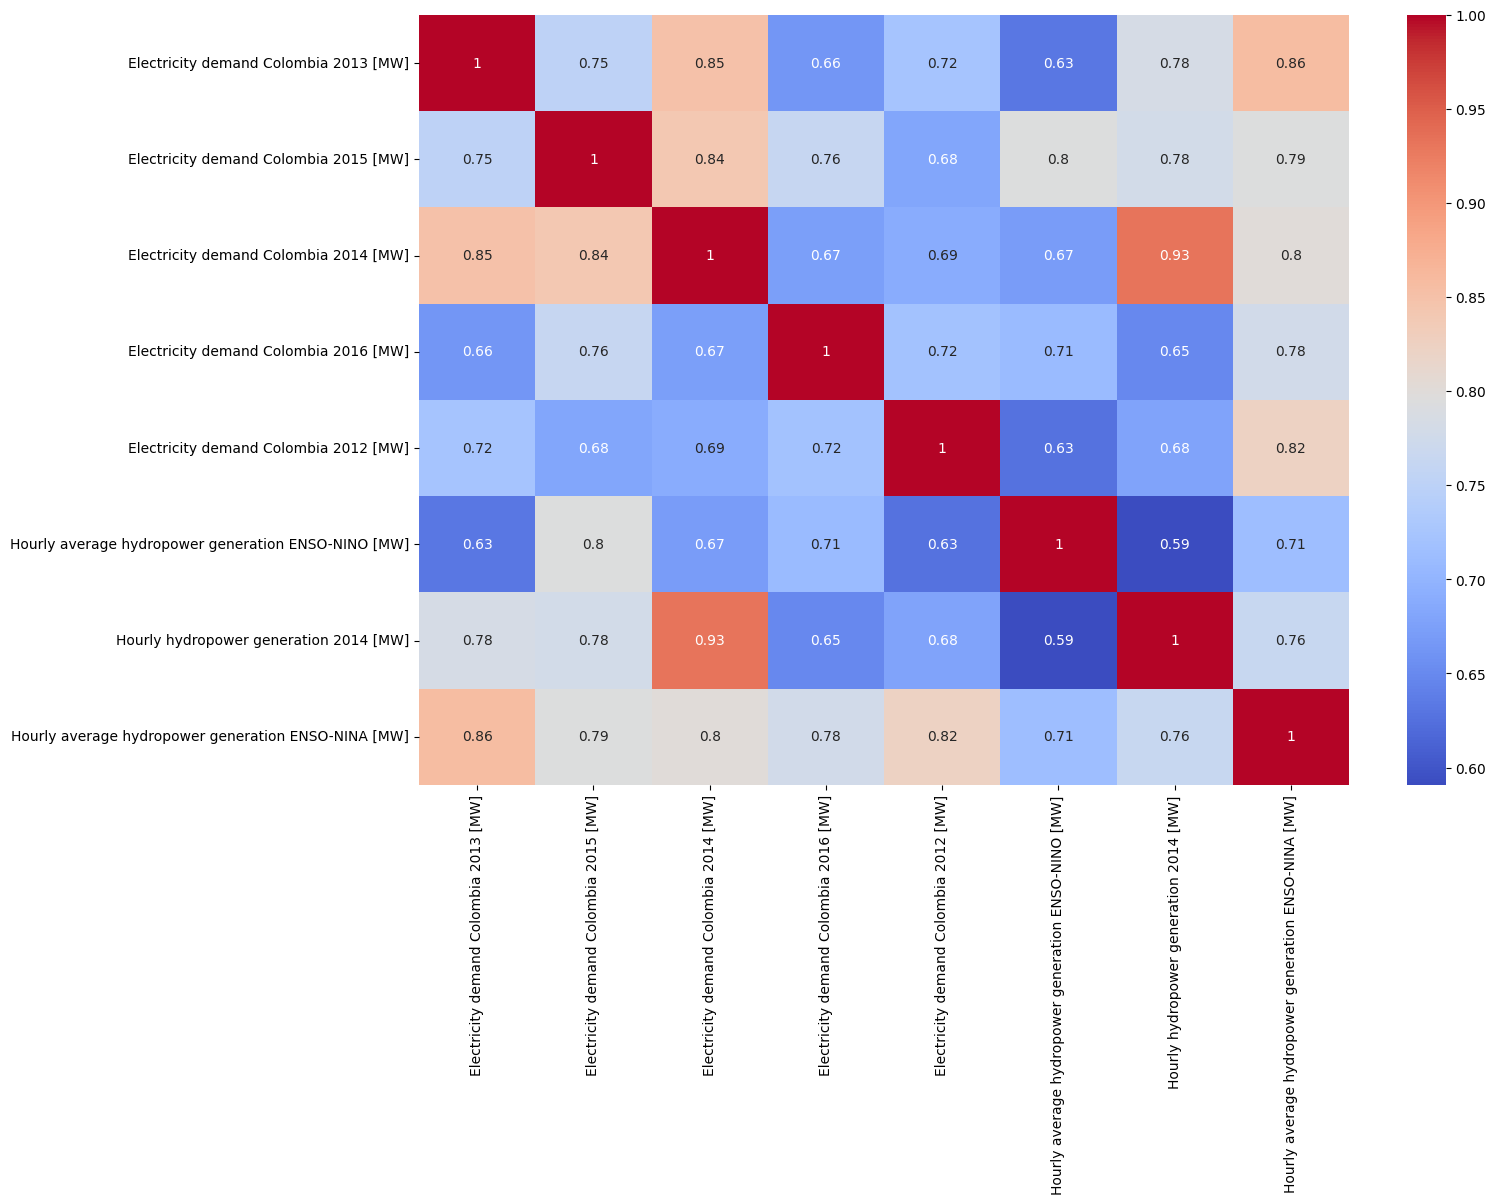

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(hours_data.iloc[:,:8].corr(), annot=True, cmap='coolwarm')
plt.show()

Observamos una correlación bastante grande con la generación hidrica vs la demanda del 2014, lo cual tienen todo el sentido, por ser del mismo año y ser variables estrechamente relacionadas

In [30]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2016 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 6   Table 1                                            12 non-null     object 
 7    Installed capacity in Colombia 2006-2016          12 non-null     object 
 8   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 9   Daily na

In [39]:
other_data = other_data.dropna(axis=1, how='all')

In [40]:
other_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2016 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 6   Table 1                                            12 non-null     object 
 7    Installed capacity in Colombia 2006-2016          12 non-null     object 
 8   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 9   Daily na

In [45]:
table_1 = other_data['Table 1']
other_data = other_data.drop('Table 1', axis=1)


KeyError: 'Install capacity in Colombia 2006-2016'

In [46]:
install_capacity = other_data[' Installed capacity in Colombia 2006-2016']
other_data = other_data.drop(' Installed capacity in Colombia 2006-2016', axis=1)

In [47]:
day_data = other_data

In [48]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2016 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 6   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 7   Daily natural water inflows time series 2006 [GW]  365 non-null    float64
 8   Daily natural water inflows time series 2015 [GW]  365 non-null    float64
 9   Daily na

<Axes: >

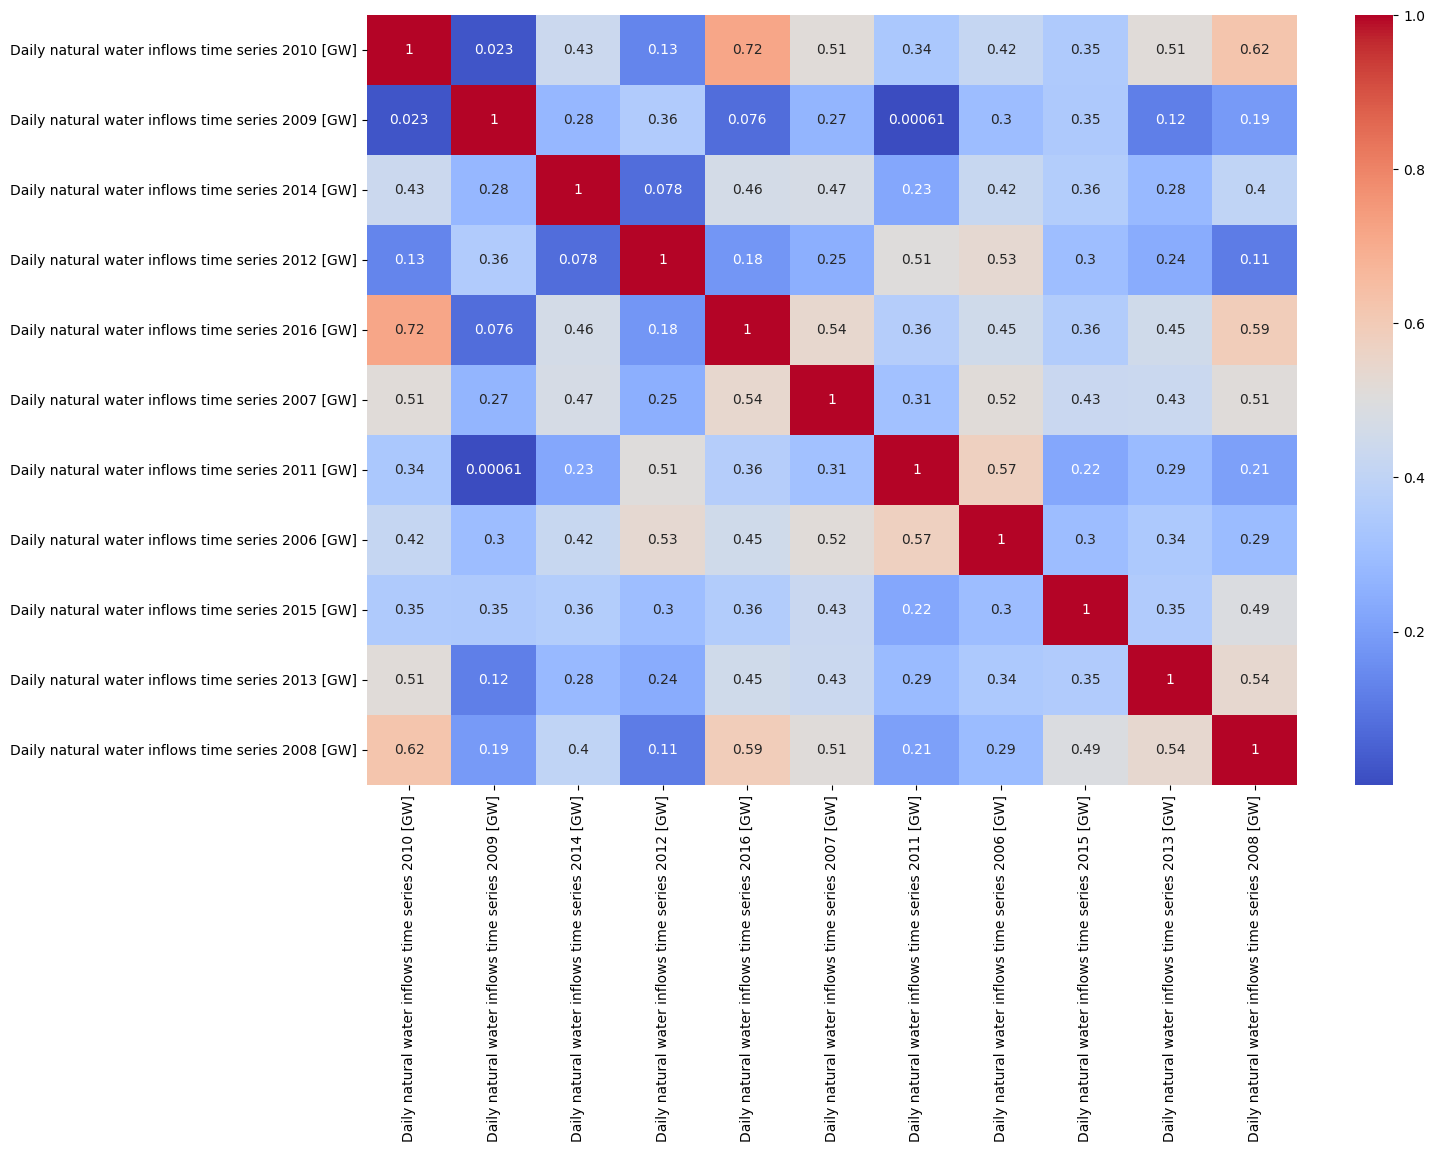

In [49]:
plt.figure(figsize=(15, 10))
sns.heatmap(day_data.corr(), annot=True, cmap='coolwarm')

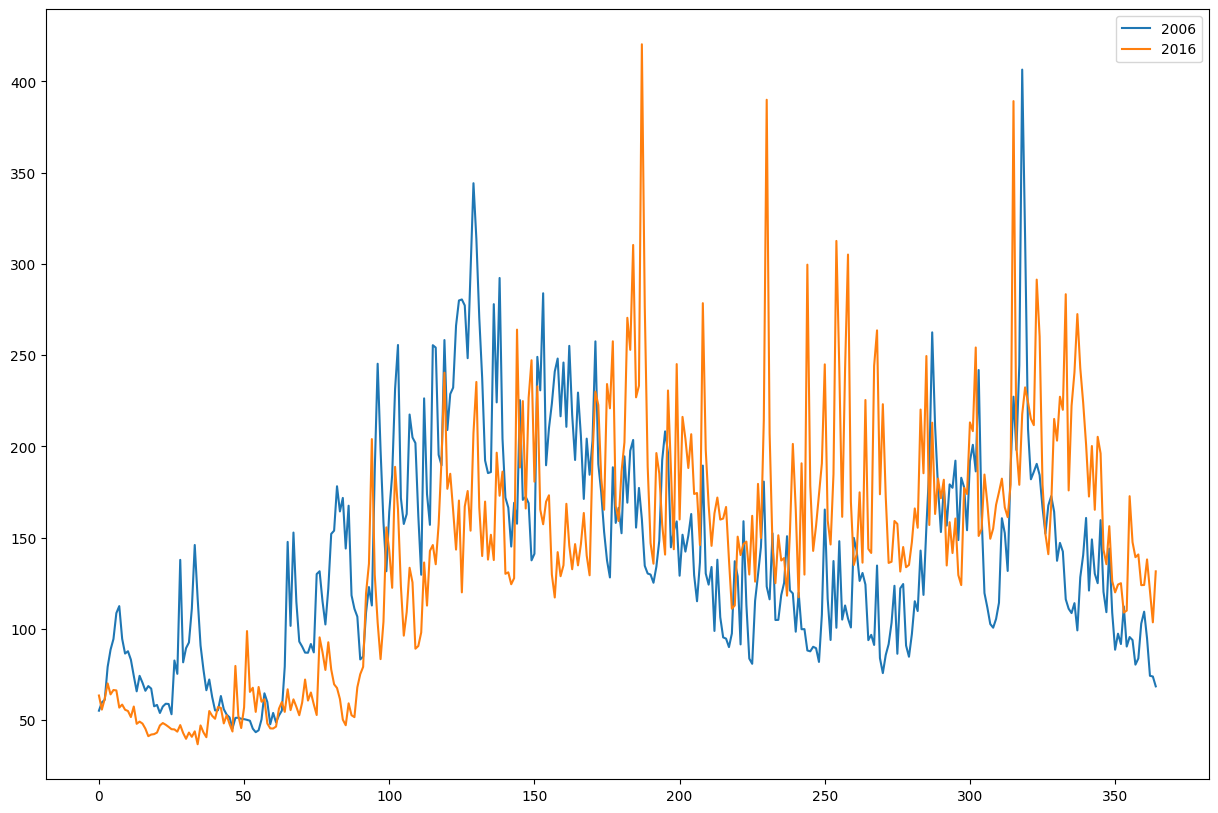

In [50]:
plt.figure(figsize=(15, 10))
plt.plot(day_data['Daily natural water inflows time series 2006 [GW]'])
plt.plot(day_data['Daily natural water inflows time series 2016 [GW]'])
plt.legend(['2006', '2016'])
plt.show()

In [52]:
table_1

,Table 1
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8791,0
8792,276
8793,276
8794,264


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Daily natural water inflows time series 2010 [GW]  365 non-null    float64
 1   Daily natural water inflows time series 2009 [GW]  365 non-null    float64
 2   Daily natural water inflows time series 2014 [GW]  365 non-null    float64
 3   Daily natural water inflows time series 2012 [GW]  365 non-null    float64
 4   Daily natural water inflows time series 2016 [GW]  365 non-null    float64
 5   Daily natural water inflows time series 2007 [GW]  365 non-null    float64
 6   Daily natural water inflows time series 2011 [GW]  365 non-null    float64
 7   Daily natural water inflows time series 2006 [GW]  365 non-null    float64
 8   Daily natural water inflows time series 2015 [GW]  365 non-null    float64
 9   Daily na

In [57]:

not_nan_data = install_capacity.dropna()
print(not_nan_data)


8784    Solar [MW]
8785             0
8786             0
8787             0
8788             0
8789             0
8790             0
8791             0
8792             0
8793             0
8794             0
8795             0
Name:  Installed capacity in Colombia 2006-2016, dtype: object
